In [2]:
import pandas as pd

features_df = pd.read_csv('alt_acsincome_ca_features_85(1).csv')
labels_df = pd.read_csv('alt_acsincome_ca_labels_85.csv')

data = pd.concat([features_df, labels_df], axis=1)


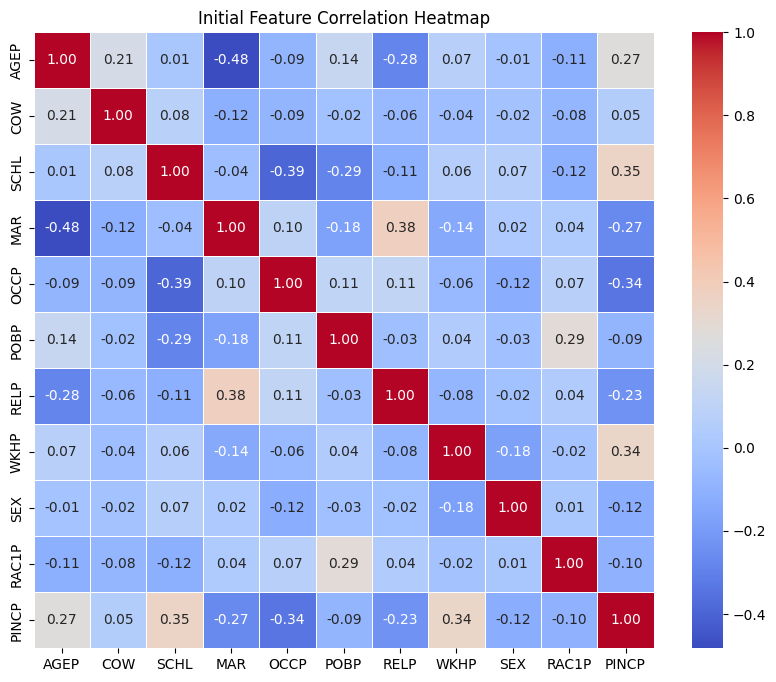

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
# 4.1.1.1 Calcul des corrélations initiales
correlations_initiales = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations_initiales, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Initial Feature Correlation Heatmap")
plt.show()


In [39]:
# 4.1.1.2  les corrélations produites par les modèles d’apprentissage????
# 4.1.2 feature_importance 


from numpy import ravel
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

labels_df=ravel(labels_df)
labels_df.shape


columns_to_scale = ['AGEP', 'WKHP'] 

x_train, x_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2, random_state=1)

scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_train_scaled[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])

x_test_scaled = x_test.copy()
x_test_scaled[columns_to_scale] = scaler.transform(x_test[columns_to_scale])


best_gradientBoosting= GradientBoostingClassifier(learning_rate=0.2, max_depth=7,n_estimators=100, random_state=42, subsample= 1.0)


best_gradientBoosting.fit(x_train_scaled, y_train)



GradientBoostingClassifier(learning_rate=0.2, max_depth=7, random_state=42)

Corrélations produites par le modèle d'apprentissage :
                AGEP       COW      SCHL       MAR      OCCP      POBP  \
AGEP        1.000000  0.209272  0.009463 -0.476955 -0.094376  0.135052   
COW         0.209272  1.000000  0.070373 -0.119972 -0.093699 -0.020278   
SCHL        0.009463  0.070373  1.000000 -0.041899 -0.398055 -0.295551   
MAR        -0.476955 -0.119972 -0.041899  1.000000  0.103430 -0.171946   
OCCP       -0.094376 -0.093699 -0.398055  0.103430  1.000000  0.108339   
POBP        0.135052 -0.020278 -0.295551 -0.171946  0.108339  1.000000   
RELP       -0.284056 -0.056611 -0.123177  0.375357  0.128285 -0.033539   
WKHP        0.062103 -0.042921  0.058500 -0.134497 -0.064157  0.043451   
SEX        -0.004439 -0.014784  0.061275  0.017380 -0.114798 -0.030659   
RAC1P      -0.106975 -0.076901 -0.109939  0.035669  0.059541  0.284424   
Prediction  0.287947  0.062931  0.443845 -0.296141 -0.446659 -0.124145   

                RELP      WKHP       SEX     RAC1P  Pred

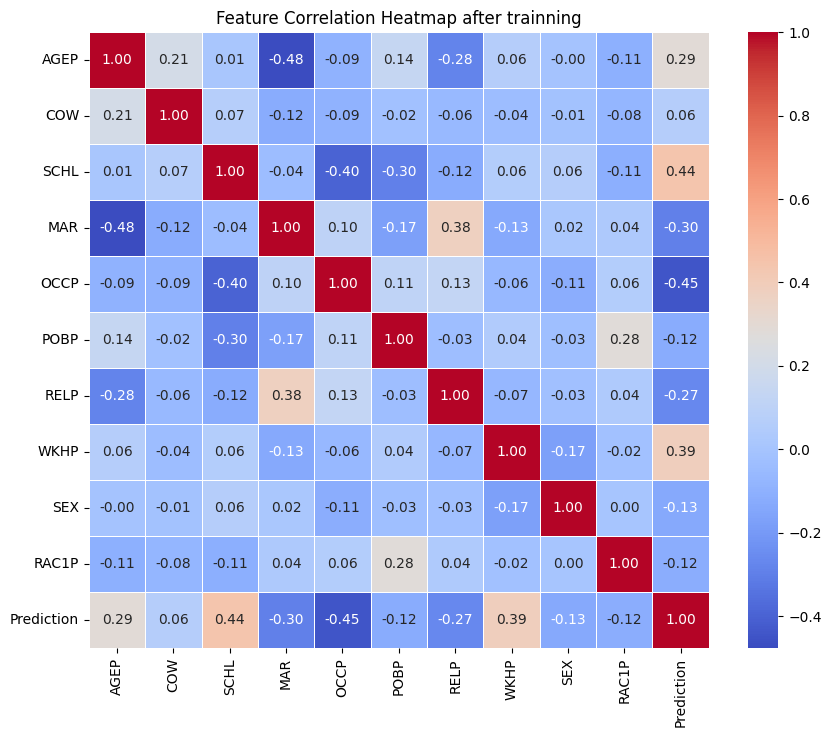

In [42]:
from sklearn.metrics import accuracy_score
import pandas as pd

y_pred = best_gradientBoosting.predict(x_test_scaled)  


test_with_pred = pd.DataFrame(x_test_scaled)
test_with_pred['Prediction'] = y_pred

correlations = test_with_pred.corr()

print("Corrélations produites par le modèle d'apprentissage :")
print(correlations)

correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap after trainning")
plt.show()


In [43]:
prediction_corr = correlations['Prediction'].drop('Prediction')

print("Corrélation des caractéristiques avec la sortie prédite :")
print(prediction_corr)
prediction_corr_ini= correlations_initiales['PINCP'].drop('PINCP')
print("Corrélation des caractéristiques initiales :")
print(prediction_corr_ini)

Corrélation des caractéristiques avec la sortie prédite :
AGEP     0.287947
COW      0.062931
SCHL     0.443845
MAR     -0.296141
OCCP    -0.446659
POBP    -0.124145
RELP    -0.268326
WKHP     0.385909
SEX     -0.132664
RAC1P   -0.118605
Name: Prediction, dtype: float64
Corrélation des caractéristiques initiales :
AGEP     0.265861
COW      0.052604
SCHL     0.350349
MAR     -0.265604
OCCP    -0.342737
POBP    -0.086425
RELP    -0.228450
WKHP     0.338392
SEX     -0.118837
RAC1P   -0.101736
Name: PINCP, dtype: float64


Importances des caractéristiques selon RandomForestClassifier :
  Feature  Importance
4    OCCP    0.377298
7    WKHP    0.199435
2    SCHL    0.126307
0    AGEP    0.105398
6    RELP    0.093895
5    POBP    0.035859
8     SEX    0.023832
1     COW    0.021551
3     MAR    0.009334
9   RAC1P    0.007089


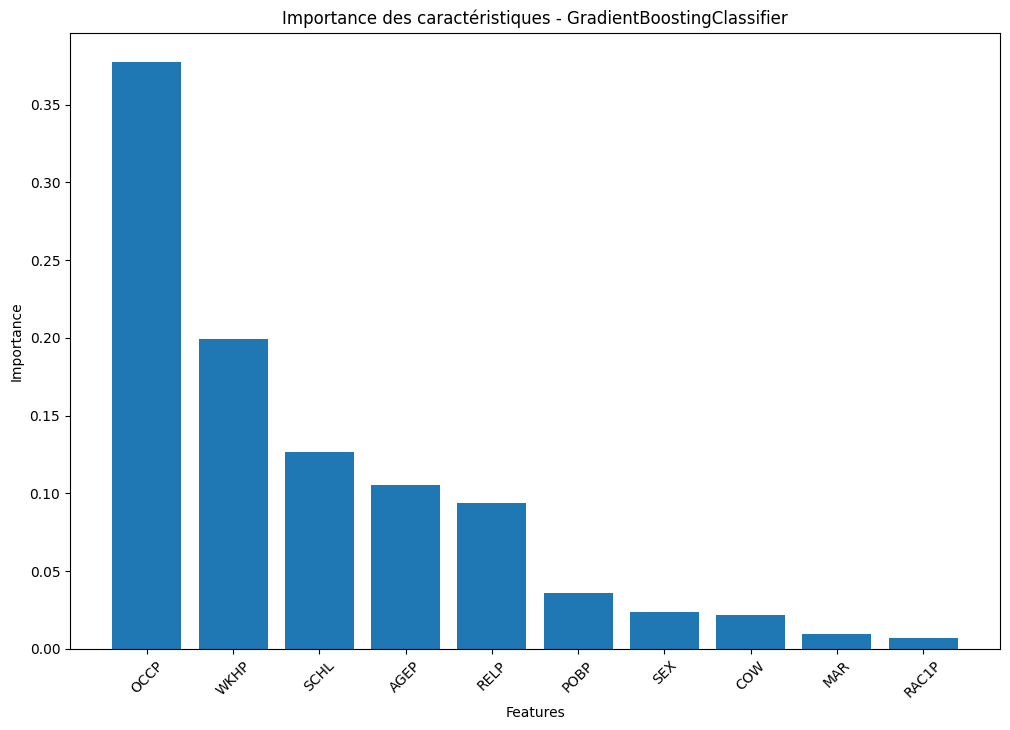

In [44]:
# Récupération des importances des caractéristiques
importances = best_gradientBoosting.feature_importances_
feature_names = features_df.columns

# Création d'un DataFrame pour visualiser les importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Afficher les importances des caractéristiques
print("Importances des caractéristiques selon RandomForestClassifier :")
print(feature_importances)

# Visualisation des importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Importance des caractéristiques - GradientBoostingClassifier')
plt.xticks(rotation=45)  
plt.show()

Importance des attributs par permutation :
  Feature  Importance
4    OCCP    0.084665
7    WKHP    0.068031
0    AGEP    0.036735
2    SCHL    0.035451
6    RELP    0.016394
1     COW    0.008252
8     SEX    0.007528
5    POBP    0.006608
9   RAC1P    0.001744
3     MAR    0.001717


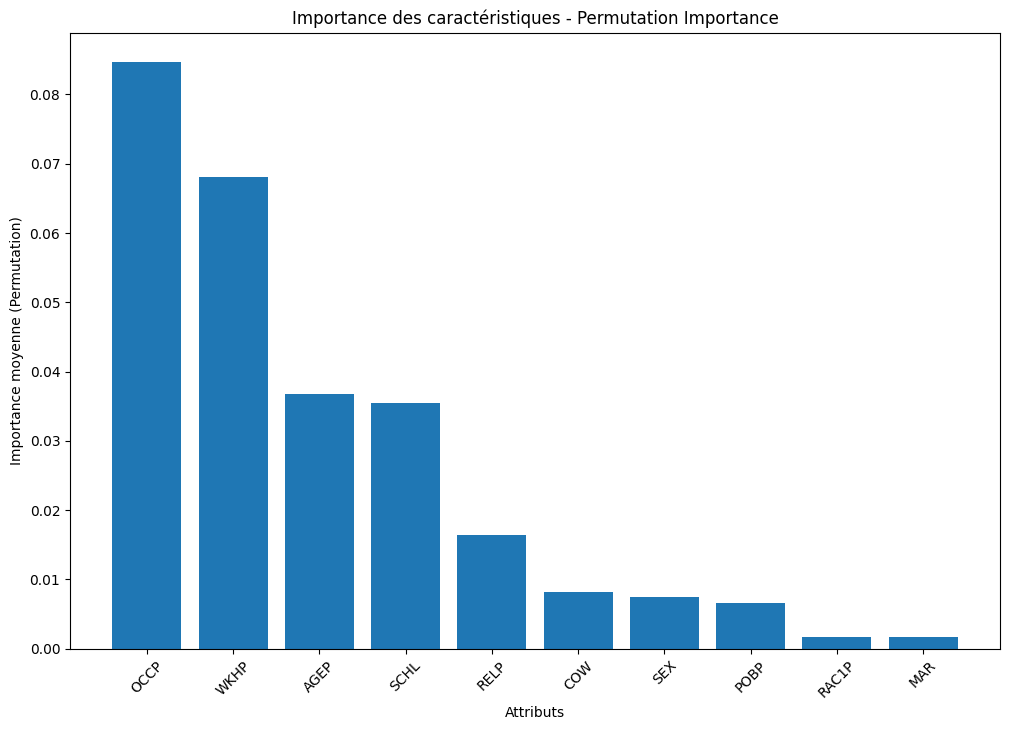

In [45]:
#4.1.2 permutation_importance pour randomforest
from sklearn.inspection import permutation_importance

# Calculer l'importance par permutation
result = permutation_importance(best_gradientBoosting, x_test_scaled, y_test, n_repeats=10, random_state=42)

# Créer un DataFrame pour les résultats
perm_importance = pd.DataFrame({
    'Feature': x_test_scaled.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Importance des attributs par permutation :")
print(perm_importance)

# Visualisation
plt.figure(figsize=(12, 8))
plt.bar(perm_importance['Feature'], perm_importance['Importance'])
plt.ylabel("Importance moyenne (Permutation)")
plt.xlabel("Attributs")
plt.title("Importance des caractéristiques - Permutation Importance")
plt.xticks(rotation=45)
plt.show()


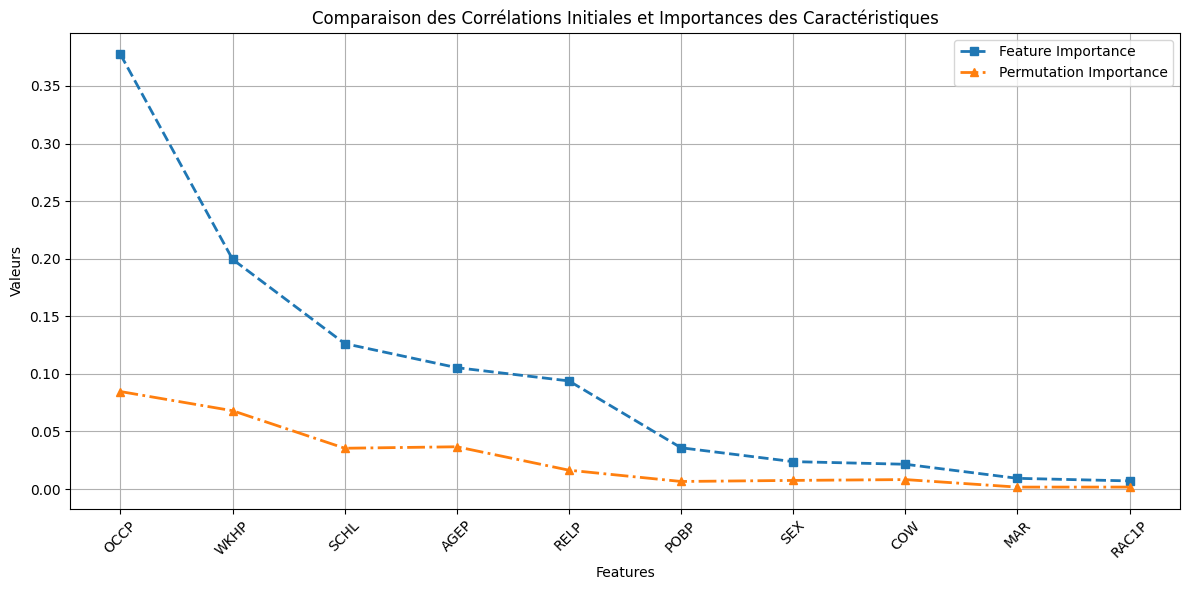

In [58]:

comparaison = pd.DataFrame({
    'Feature Importance': feature_importances.set_index('Feature')['Importance'],
    'Permutation Importance': perm_importance.set_index('Feature')['Importance']
})

import matplotlib.pyplot as plt

# Assurez-vous que les colonnes sont alignées correctement
comparaison = comparaison.sort_values(by='Feature Importance', ascending=False)

# Préparer les données pour le graphique
features = comparaison.index  # Les noms des features
feature_importance = comparaison['Feature Importance']
permutation_importance = comparaison['Permutation Importance']
plt.figure(figsize=(12, 6))
plt.plot(features, feature_importance, marker='s', label='Feature Importance ', linestyle='--', linewidth=2)
plt.plot(features, permutation_importance, marker='^', label='Permutation Importance', linestyle='-.', linewidth=2)

# Ajouter des titres et des légendes
plt.title("Comparaison des Corrélations Initiales et Importances des Caractéristiques")
plt.xlabel("Features")
plt.ylabel("Valeurs")
plt.xticks(rotation=45)  # Rotation des labels pour lisibilité
plt.legend()
plt.grid()

# Afficher le graphique
plt.tight_layout()
plt.show()

In [47]:

# 4.2.1 Analyse des taux par genre (biais initial des données)

# Ajouter la colonne 'PINCP' (les étiquettes binaires) aux données d'entraînement
train_data = x_train_scaled
train_data['PINCP'] = y_train

# Taux global d'individus avec un revenu > 50 000 (PINCP = 1)
taux_global = train_data['PINCP'].mean()
# Taux par genre
taux_hommes = train_data[train_data['SEX'] == 1]['PINCP'].mean()
taux_femmes = train_data[train_data['SEX'] == 2]['PINCP'].mean()

# Afficher les résultats
print(f"Taux global des individus avec revenu > 50 000 : {taux_global:.2%}")
print(f"Taux des hommes avec revenu > 50 000 : {taux_hommes:.2%}")
print(f"Taux des femmes avec revenu > 50 000 : {taux_femmes:.2%}")

# Vérification de la différence de taux entre hommes et femmes
if taux_hommes > taux_femmes:
    print("Le taux est plus élevé pour les hommes.")
elif taux_hommes < taux_femmes:
    print("Le taux est plus élevé pour les femmes.")
else:
    print("Le taux est identique pour les deux genres.")



Taux global des individus avec revenu > 50 000 : 40.97%
Taux des hommes avec revenu > 50 000 : 46.48%
Taux des femmes avec revenu > 50 000 : 34.82%
Le taux est plus élevé pour les hommes.


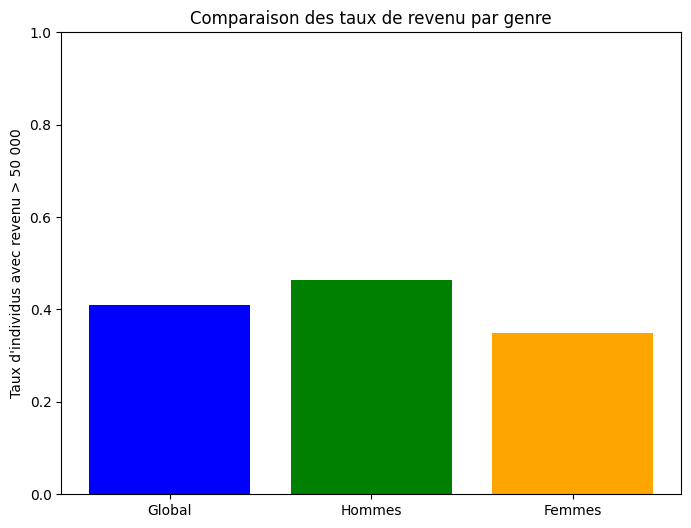

In [32]:
categories = ['Global', 'Hommes', 'Femmes']
values = [taux_global, taux_hommes, taux_femmes]


plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'green', 'orange'])
plt.ylabel("Taux d'individus avec revenu > 50 000")
plt.title("Comparaison des taux de revenu par genre")
plt.ylim(0, 1)  
plt.show()

In [48]:
#4.2.2
from sklearn.metrics import confusion_matrix

y_pred = best_gradientBoosting.predict(x_test_scaled)
results_df = pd.DataFrame({
    'SEX': x_test_scaled['SEX'].values, 
    'True_Label': y_test,
    'Predicted_Label': y_pred
})
male_data = results_df[results_df['SEX'] == 1]
male_cm = confusion_matrix(male_data['True_Label'], male_data['Predicted_Label'])
print("Confusion Matrix pour les hommes :")
print(male_cm)

# 女性混淆矩阵
female_data = results_df[results_df['SEX'] == 2]
female_cm = confusion_matrix(female_data['True_Label'], female_data['Predicted_Label'])
print("\nConfusion Matrix pour les femmes :")
print(female_cm)


Confusion Matrix pour les hommes :
[[7835 1608]
 [1571 6713]]

Confusion Matrix pour les femmes :
[[8940 1184]
 [1334 4078]]


In [49]:
def extract_metrics(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    return tn, fp, fn, tp

def calculate_fairness_metrics(tn, fp, fn, tp, total_samples):

    statistical_parity = (tp + fp) / total_samples
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    return statistical_parity, tpr, fpr


male_tn, male_fp, male_fn, male_tp = extract_metrics(male_cm)
female_tn, female_fp, female_fn, female_tp = extract_metrics(female_cm)


male_total = male_tn + male_fp + male_fn + male_tp
female_total = female_tn + female_fp + female_fn + female_tp

male_metrics = calculate_fairness_metrics(male_tn, male_fp, male_fn, male_tp, male_total)
female_metrics = calculate_fairness_metrics(female_tn, female_fp, female_fn, female_tp, female_total)


print("=== Comparaison des indicateurs ===")
print(f"Statistical Parity - Hommes : {male_metrics[0]:.2%}, Femmes : {female_metrics[0]:.2%}")
print(f"Equal Opportunity  - Hommes : {male_metrics[1]:.2%}, Femmes : {female_metrics[1]:.2%}")
print(f"Predictive Equality - Hommes : {male_metrics[2]:.2%}, Femmes : {female_metrics[2]:.2%}")

=== Comparaison des indicateurs ===
Statistical Parity - Hommes : 46.94%, Femmes : 33.87%
Equal Opportunity  - Hommes : 81.04%, Femmes : 75.35%
Predictive Equality - Hommes : 17.03%, Femmes : 11.69%


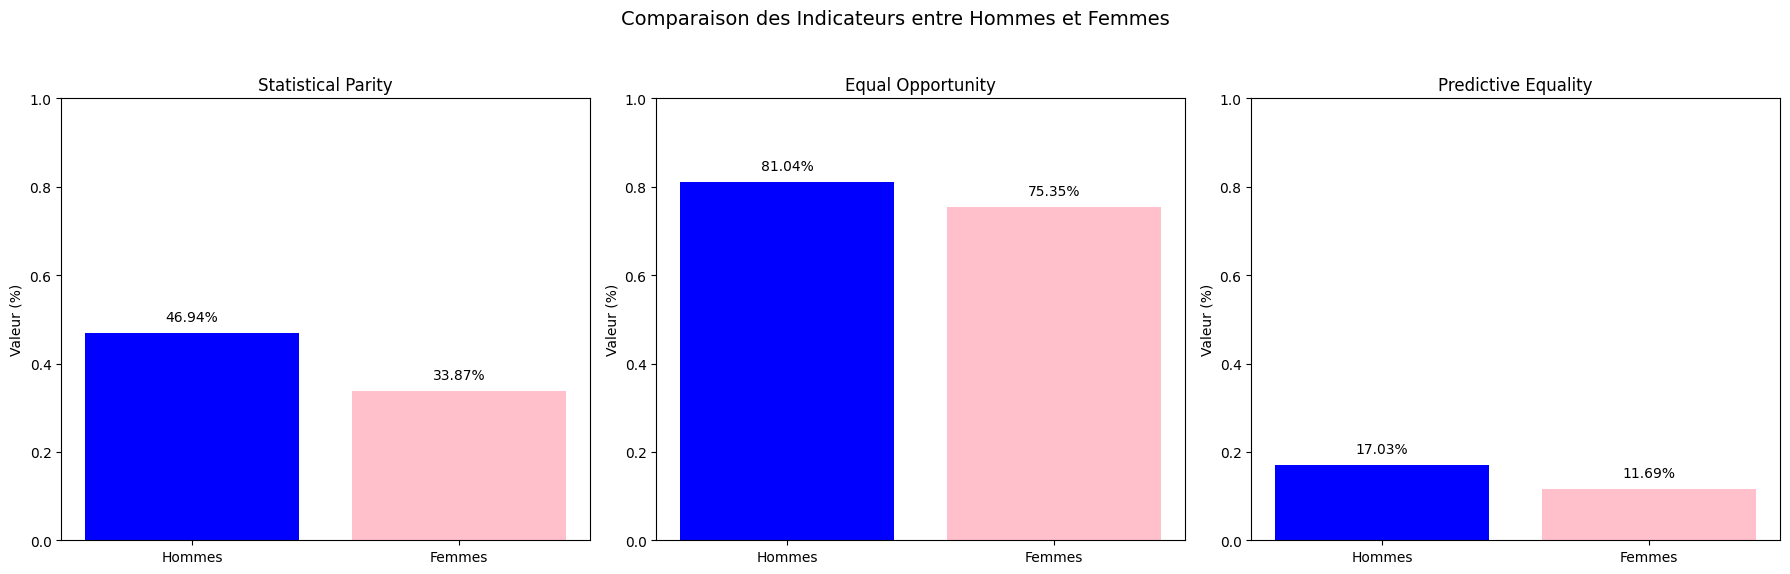

In [50]:
import matplotlib.pyplot as plt

metrics = ['Statistical Parity', 'Equal Opportunity', 'Predictive Equality']
male_values = [male_metrics[0], male_metrics[1], male_metrics[2]]  
female_values = [female_metrics[0], female_metrics[1], female_metrics[2]]  

colors = ['blue', 'pink']
labels = ['Hommes', 'Femmes']


fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

for i, ax in enumerate(axes):

    ax.bar(labels, [male_values[i], female_values[i]], color=colors)
    

    ax.set_title(metrics[i])
    ax.set_ylabel('Valeur (%)')
    ax.set_ylim(0, 1)

    for j, value in enumerate([male_values[i], female_values[i]]):
        ax.text(j, value + 0.02, f'{value:.2%}', ha='center', va='bottom', fontsize=10)


plt.suptitle('Comparaison des Indicateurs entre Hommes et Femmes', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2, random_state=1)

#garder le sex avec ordre de donne pour data suivant
sex_test = x_test['SEX'].copy()
#enlever_sex
x_train = x_train.drop(columns=['SEX'])
x_test = x_test.drop(columns=['SEX'])

columns_to_scale = ['AGEP', 'WKHP']
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_train_scaled[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])

x_test_scaled = x_test.copy()
x_test_scaled[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

best_rf = RandomForestClassifier(max_features='sqrt', 
                                 min_samples_leaf=2, 
                                 min_samples_split=2, 
                                 n_estimators=100, 
                                 max_depth=7, 
                                 random_state=42)

best_rf.fit(x_train_scaled, y_train)


In [62]:

y_pred = best_rf.predict(x_test_scaled)

results_df = pd.DataFrame({
    'SEX': sex_test,
    'True_Label': y_test,
    'Predicted_Label': y_pred
})
male_data = results_df[results_df['SEX'] == 1]
male_cm = confusion_matrix(male_data['True_Label'], male_data['Predicted_Label'])
print("Confusion Matrix pour les hommes :")
print(male_cm)

female_data = results_df[results_df['SEX'] == 2]
female_cm = confusion_matrix(female_data['True_Label'], female_data['Predicted_Label'])
print("\nConfusion Matrix pour les femmes :")
print(female_cm)


Confusion Matrix pour les hommes :
[[8040 1403]
 [2234 6050]]

Confusion Matrix pour les femmes :
[[8484 1640]
 [1305 4107]]
